<H1> SOLAR POWER GENERATION DATA - SL PROJECT DRAFT </h1>

https://www.kaggle.com/datasets/anikannal/solar-power-generation-data 

In [107]:
#importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

<h2> HOW A SOLAR PANNEL WORKS? </H2>

Long story short: when a photon hits the surface of the photovoltaic cell, its energy is transferred to the electrons present on the silicon cell. These electrons are "excited" and begin to flow in the circuit producing electric current. A solar panel produces Direct Current energy,(DC power).

Then, it's up to the inverter to convert it into alternating current to transport it and use it in our distribution networks. In fact, domestic and industrial buildings are designed for the transport and use of alternating current.

Every solar power plant consists at least of two basic components:
Modules- that convert sunlight into electricity
One or more inverters- devices that convert direct current into alternating current.

Typically the factors that determine the performance of a solar power plant are:

Temperature
Dirtiness
Inverters Efficiency
Inverters or panels seniority


<H2> OBJECTIVES </H2>

1. Can we predict the power generation for next couple of days? - this allows for better grid management

2. Can we identify the need for panel cleaning/maintenance? 

3. Can we identify faulty or suboptimally performing equipment? 

In [108]:
#importing Plant 1 generation data
plant1_gen_df = pd.read_csv('Plant_1_Generation_Data.csv')

In [109]:
#importing Plant 1 weather sensor data
plant1_weat_df = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

In [110]:
plant1_gen_df.tail(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0
68777,17-06-2020 23:45,4135001,zVJPv84UY57bAof,0.0,0.0,5910.000,7363272.0


In [111]:
df_inverter1 = plant1_gen_df[plant1_gen_df['SOURCE_KEY'] == 'uHbuxQJl8lW7ozc']
df_inverter1

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
16,15-05-2020 00:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,0.0,7038681.0
37,15-05-2020 00:15,4135001,uHbuxQJl8lW7ozc,0.0,0.0,0.0,7038681.0
58,15-05-2020 00:30,4135001,uHbuxQJl8lW7ozc,0.0,0.0,0.0,7038681.0
79,15-05-2020 00:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,0.0,7038681.0
101,15-05-2020 01:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,0.0,7038681.0
...,...,...,...,...,...,...,...
68685,17-06-2020 22:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.0,7287002.0
68707,17-06-2020 23:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.0,7287002.0
68729,17-06-2020 23:15,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.0,7287002.0
68751,17-06-2020 23:30,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.0,7287002.0


<Axes: >

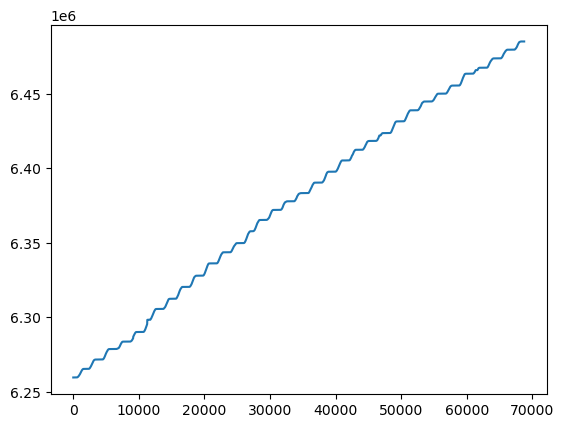

In [112]:
df_temp = plant1_gen_df[plant1_gen_df['SOURCE_KEY']=='1BY6WEcLGh8j5v7']

#plt.figure(figsize=(12,8))
df_temp['TOTAL_YIELD'].plot()
#plt.show()

Solar power generation data for one plant gathered at 15 minutes intervals over a 34 days period.

- DATE TIME: Date and time for each observation. Observations recorded at 15 minute intervals.

- PLANT ID: Plant ID - this will be common for the entire file.

- SOURCE KEY: Source key in this file stands for the inverter id.

- DC POWER: Amount of DC power generated by the inverter (source_key) in this 15 minute interval. Units - kW.

- AC POWER: Amount of AC power generated by the inverter (source_key) in this 15 minute interval. Units - kW.

- DAILY_YIELD: Daily yield is a cumulative sum of power generated on that day, till that point in time.

- TOTAL_YIELD: This is the total yield for the inverter till that point in time.

In [113]:
#info plant 1 gen data
plant1_gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [114]:
#plant 1 weather data
plant1_weat_df.tail(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0
3181,2020-06-17 23:45:00,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0


- DATE TIME: Date and time for each observation. Observations recorded at 15 minute intervals.

- PLANT ID: Plant ID this will be common for the entire file

- SOURCE KEY: Stands for the sensor panel id. This will be common for the entire file because there's only one sensor panel for the plant.

- AMBIENT TEMPERATURE: This is the ambient temperature at the plant.

- MODULE TEMPERATURE: There's a module (solar panel) attached to the sensor panel. This is the temperature reading for that module.

- IRRADIATION: Amount of irradiation for the 15 minute interval.

In [115]:
#info plant 1 weat data
plant1_weat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


<h2>some plots</h2>

In [116]:
#transforming the date in date time type
plant1_gen_df['DATE_TIME'] = pd.to_datetime(plant1_gen_df['DATE_TIME'])
plant1_gen_df

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


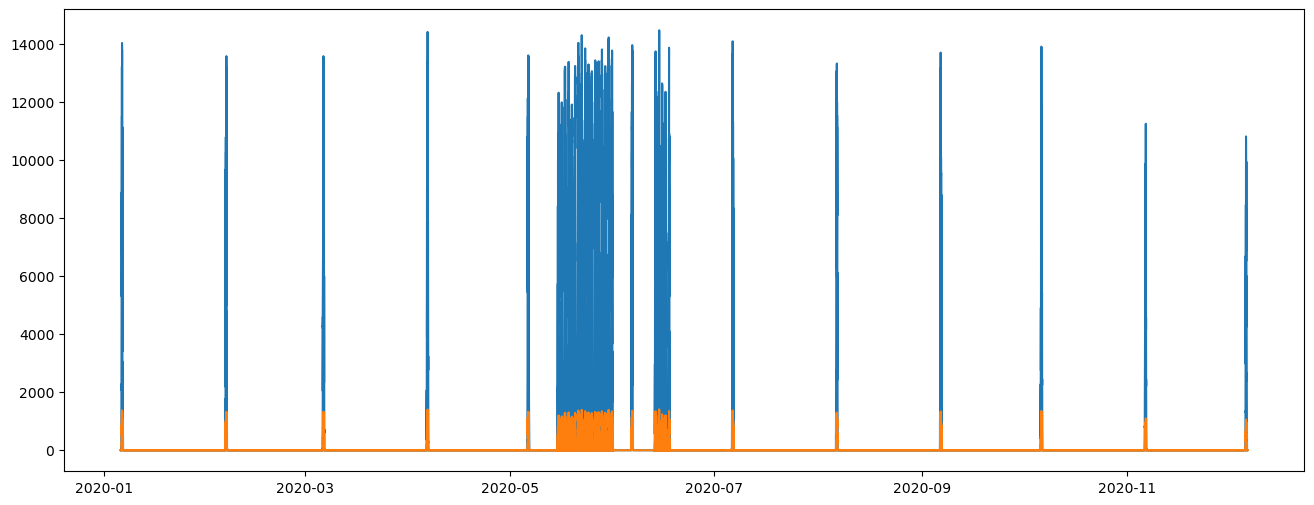

In [117]:
#plotting the dc power and ac_power over date
plt.figure(figsize=(16,6))
plt.plot(plant1_gen_df['DATE_TIME'],plant1_gen_df['DC_POWER'])
plt.plot(plant1_gen_df['DATE_TIME'],plant1_gen_df['AC_POWER'])
plt.show()

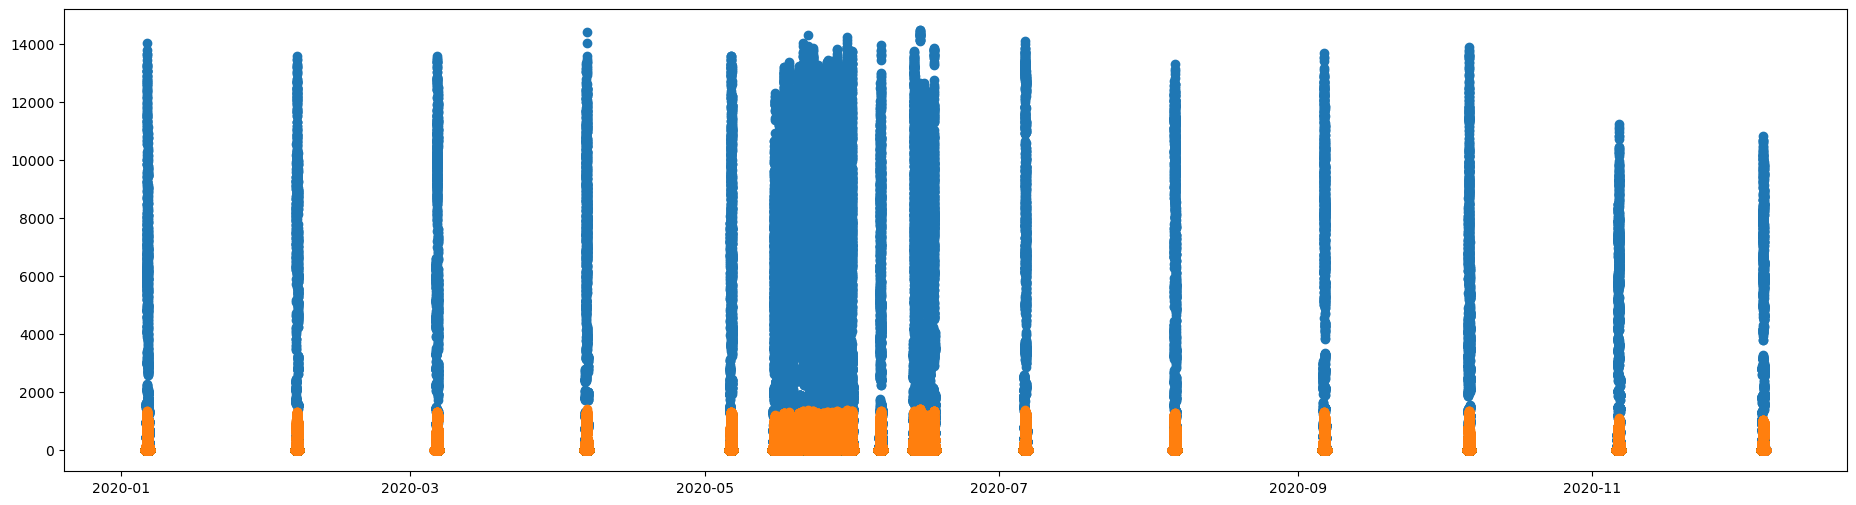

In [118]:
#scatter the dc power and ac power over date
plt.figure(figsize=(23,6))
plt.scatter(plant1_gen_df['DATE_TIME'],plant1_gen_df['DC_POWER'])
plt.scatter(plant1_gen_df['DATE_TIME'],plant1_gen_df['AC_POWER'])
plt.show()

In [119]:
#plot for one day
df_inverter1['DATE_TIME'] = pd.to_datetime(df_inverter1['DATE_TIME'])
filtered_df = df_inverter1[df_inverter1['DATE_TIME'].dt.date == pd.to_datetime('15-06-2020').date()]
filtered_df


/var/folders/hy/8k3n5m116bj5d9zy449s77lc0000gn/T/ipykernel_1343/2401863662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inverter1['DATE_TIME'] = pd.to_datetime(df_inverter1['DATE_TIME'])
/var/folders/hy/8k3n5m116bj5d9zy449s77lc0000gn/T/ipykernel_1343/2401863662.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  filtered_df = df_inverter1[df_inverter1['DATE_TIME'].dt.date == pd.to_datetime('15-06-2020').date()]


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
62503,2020-06-15 00:00:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,0.0,7267837.0
62525,2020-06-15 00:15:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,0.0,7267837.0
62547,2020-06-15 00:30:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,0.0,7267837.0
62569,2020-06-15 00:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,0.0,7267837.0
62591,2020-06-15 01:00:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,0.0,7267837.0
...,...,...,...,...,...,...,...
64505,2020-06-15 22:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,6906.0,7274743.0
64527,2020-06-15 23:00:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,6906.0,7274743.0
64549,2020-06-15 23:15:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,6906.0,7274743.0
64571,2020-06-15 23:30:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,6906.0,7274743.0


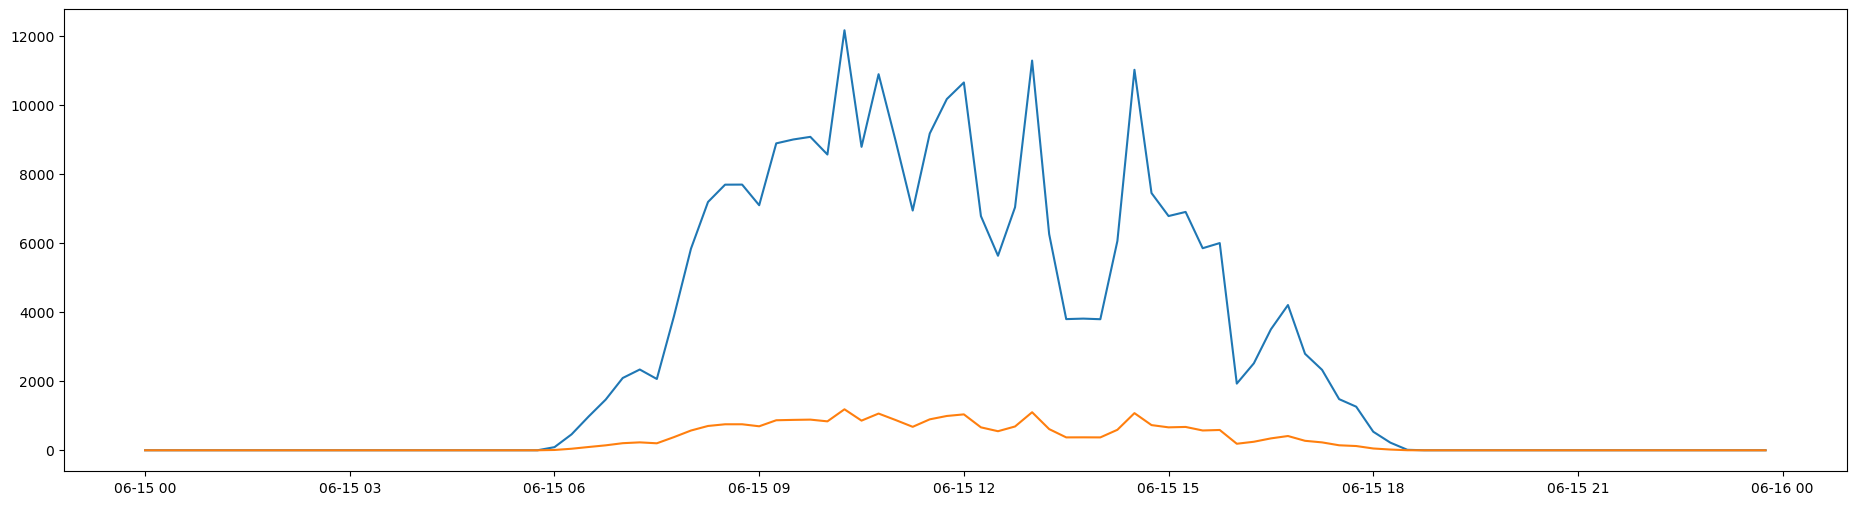

In [120]:
#same plot for inverter 1
plt.figure(figsize=(23,6))
plt.plot(filtered_df['DATE_TIME'],filtered_df['DC_POWER'])
plt.plot(filtered_df['DATE_TIME'],filtered_df['AC_POWER'])
plt.show()

In [121]:
df_inverter1.drop(['PLANT_ID','SOURCE_KEY','TOTAL_YIELD'],axis=1)

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD
16,2020-05-15 00:00:00,0.0,0.0,0.0
37,2020-05-15 00:15:00,0.0,0.0,0.0
58,2020-05-15 00:30:00,0.0,0.0,0.0
79,2020-05-15 00:45:00,0.0,0.0,0.0
101,2020-05-15 01:00:00,0.0,0.0,0.0
...,...,...,...,...
68685,2020-06-17 22:45:00,0.0,0.0,5967.0
68707,2020-06-17 23:00:00,0.0,0.0,5967.0
68729,2020-06-17 23:15:00,0.0,0.0,5967.0
68751,2020-06-17 23:30:00,0.0,0.0,5967.0


In [122]:
df_inverter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3125 entries, 16 to 68773
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    3125 non-null   datetime64[ns]
 1   PLANT_ID     3125 non-null   int64         
 2   SOURCE_KEY   3125 non-null   object        
 3   DC_POWER     3125 non-null   float64       
 4   AC_POWER     3125 non-null   float64       
 5   DAILY_YIELD  3125 non-null   float64       
 6   TOTAL_YIELD  3125 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 195.3+ KB


In [126]:
#converto date time in float
df_inverter1['DATE_TIME'] = pd.to_datetime(df_inverter1['DATE_TIME'])
df_inverter1['DATE_TIME'] = df_inverter1['DATE_TIME'].apply(lambda x: x.timestamp())
df_inverter1

/var/folders/hy/8k3n5m116bj5d9zy449s77lc0000gn/T/ipykernel_1343/3102954483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inverter1['DATE_TIME'] = pd.to_datetime(df_inverter1['DATE_TIME'])
/var/folders/hy/8k3n5m116bj5d9zy449s77lc0000gn/T/ipykernel_1343/3102954483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inverter1['DATE_TIME'] = df_inverter1['DATE_TIME'].apply(lambda x: x.timestamp())


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
16,1.589501,4135001,uHbuxQJl8lW7ozc,0.0,0.0,0.0,7038681.0
37,1.589502,4135001,uHbuxQJl8lW7ozc,0.0,0.0,0.0,7038681.0
58,1.589503,4135001,uHbuxQJl8lW7ozc,0.0,0.0,0.0,7038681.0
79,1.589503,4135001,uHbuxQJl8lW7ozc,0.0,0.0,0.0,7038681.0
101,1.589504,4135001,uHbuxQJl8lW7ozc,0.0,0.0,0.0,7038681.0
...,...,...,...,...,...,...,...
68685,1.592434,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.0,7287002.0
68707,1.592435,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.0,7287002.0
68729,1.592436,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.0,7287002.0
68751,1.592437,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.0,7287002.0


In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Separare le feature e il target
X = df_inverter1.drop(['PLANT_ID', 'SOURCE_KEY', 'TOTAL_YIELD'], axis=1)
y = df_inverter1['TOTAL_YIELD']

# Dividere il dataset in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creare il modello di regressione lineare
model = LinearRegression()

# Addestrare il modello
model.fit(X_train, y_train)

# Fare previsioni sul set di test
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Valutare il modello utilizzando la Mean Squared Error (MSE)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"\nMean Squared Error sul set di test: {mse_test}")

# Calcolare il R^2 per il set di test
r2_test = r2_score(y_test, y_pred_test)
print(f"R^2 sul set di test: {r2_test}")

# Calcolare il R^2 per il set di addestramento
r2_train = r2_score(y_train, y_pred_train)
print(f"R^2 sul set di addestramento: {r2_train}")

# Effettuare la cross-validation
# Utilizziamo 5-fold cross-validation per valutare il modello
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()  # La cross_val_score restituisce punteggi negativi per MSE
print(f"\nMean Squared Error medio dalla cross-validation: {cv_mse}")

# Visualizzare i punteggi della cross-validation
print("\nPunteggi della cross-validation (MSE negativo):")
print(cv_scores)



Mean Squared Error sul set di test: 4775094872.284131
R^2 sul set di test: 0.1470781356903641
R^2 sul set di addestramento: 0.1668388510216572

Mean Squared Error medio dalla cross-validation: 8161072771.765543

Punteggi della cross-validation (MSE negativo):
[-1.54275758e+10 -3.34336935e+09 -8.17049628e+09 -1.82162289e+09
 -1.20422996e+10]


In [ ]:
#create a linear regression creating the dummy variables for each inverter